Fire dataset

In [1]:
import os
import pandas as pd
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:


fire_all = pd.read_csv("data/processed/fire_2024_all.csv")
print("Forme du dataset :", fire_all.shape)
fire_all.head()


Forme du dataset : (90250, 15)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2


In [28]:
import pandas as pd

# Charger le dataset
fire_all = pd.read_csv("data/processed/fire_2024_all.csv")
print("Forme avant filtrage :", fire_all.shape)

# Garder seulement les lignes où type = 0
fire_filtered = fire_all[fire_all["type"] == 0].copy()

print("Forme après filtrage :", fire_filtered.shape)

# Afficher un aperçu
fire_filtered.head()


Forme avant filtrage : (90250, 15)
Forme après filtrage : (14216, 15)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
5,35.70751,5.53337,312.32,0.45,0.39,2024-01-01,141,N20,VIIRS,n,2,268.88,1.25,N,0
13,32.13579,6.46961,326.80,0.56,0.43,2024-01-01,142,N20,VIIRS,n,2,279.44,5.52,N,0
20,32.35563,6.97630,341.76,0.39,0.44,2024-01-01,142,N20,VIIRS,n,2,280.66,10.25,N,0
64,28.19791,9.39581,327.82,0.33,0.55,2024-01-01,143,N20,VIIRS,n,2,277.00,1.44,N,0
67,28.12826,9.49323,308.57,0.33,0.55,2024-01-01,143,N20,VIIRS,n,2,278.63,0.85,N,0


In [32]:
import pandas as pd
import os

# Le bon chemin complet
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_2024_type0.csv"

# Sauvegarde
fire_filtered.to_csv(output_path, index=False)

print("✔ Fichier sauvegardé sous :", output_path)


✔ Fichier sauvegardé sous : C:\Users\DELL\Desktop\project_fire\data\processed\fire_2024_type0.csv


In [30]:
import pandas as pd

path = r"data/processed/fire_2024_type0.csv"

fire = pd.read_csv(path)

print("Shape du dataset :", fire.shape)
print(fire.head())


Shape du dataset : (14216, 15)
   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  35.70751    5.53337      312.32  0.45   0.39  2024-01-01       141   
1  32.13579    6.46961      326.80  0.56   0.43  2024-01-01       142   
2  32.35563    6.97630      341.76  0.39   0.44  2024-01-01       142   
3  28.19791    9.39581      327.82  0.33   0.55  2024-01-01       143   
4  28.12826    9.49323      308.57  0.33   0.55  2024-01-01       143   

  satellite instrument confidence  version  bright_ti5    frp daynight  type  
0       N20      VIIRS          n        2      268.88   1.25        N     0  
1       N20      VIIRS          n        2      279.44   5.52        N     0  
2       N20      VIIRS          n        2      280.66  10.25        N     0  
3       N20      VIIRS          n        2      277.00   1.44        N     0  
4       N20      VIIRS          n        2      278.63   0.85        N     0  


In [ ]:
fire.duplicated().sum()


np.int64(0)

In [11]:
fire = fire.drop_duplicates()
print("Après suppression des doublons :", fire.shape)


Après suppression des doublons : (14216, 15)


In [14]:
fire[fire.duplicated()]


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type


In [15]:
fire.duplicated(subset=["latitude", "longitude"]).sum()


np.int64(6)

In [16]:
fire[fire.duplicated(subset=["latitude", "longitude"], keep=False)]


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
205,31.36034,6.05312,296.11,0.48,0.48,2024-01-09,52,N20,VIIRS,n,2,273.30,0.92,N,0
1247,31.18755,6.78299,299.08,0.56,0.69,2024-02-11,214,N20,VIIRS,n,2,280.59,1.67,N,0
2377,31.18631,6.78953,350.76,0.38,0.36,2024-03-17,1235,N20,VIIRS,n,2,313.66,2.91,D,0
3314,31.35853,6.05200,340.39,0.39,0.36,2024-04-11,1242,N20,VIIRS,n,2,307.12,2.30,D,0
3478,31.18746,6.78547,347.20,0.40,0.60,2024-04-19,35,N20,VIIRS,n,2,288.94,2.55,N,0
4389,31.36034,6.05312,310.93,0.57,0.52,2024-05-15,47,N20,VIIRS,n,2,293.98,2.01,N,0
5559,31.90153,6.06851,356.90,0.35,0.56,2024-06-11,1157,N20,VIIRS,l,2,310.68,10.89,D,0
6705,31.18631,6.78953,356.42,0.38,0.59,2024-07-14,1318,N20,VIIRS,l,2,318.06,4.51,D,0
7262,31.18746,6.78547,330.30,0.38,0.36,2024-07-27,117,N20,VIIRS,n,2,300.62,3.30,N,0
8942,31.35853,6.05200,322.20,0.48,0.48,2024-09-09,51,N20,VIIRS,n,2,295.74,3.11,N,0


In [17]:
gdf_fire = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs=4326   # CRS des coordonnées originales
)

print(gdf_fire.crs)


EPSG:4326


In [1]:
import geopandas as gpd
import shapely

landcover_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion.shp"

# 1) Charger
landcover = gpd.read_file(landcover_path)
print("Total polygones :", len(landcover))

# --- Réparer géométries invalides ---
landcover["geometry"] = landcover["geometry"].buffer(0)

# 2) Dissolve par chunks
chunk_size = 20000   # 20k pour ne pas bloquer le PC
chunks = []

for i in range(0, len(landcover), chunk_size):
    print(f"Traitement du chunk {i} → {i+chunk_size} ...")
    chunk = landcover.iloc[i:i+chunk_size].copy()
    dissolved = chunk.dissolve()
    chunks.append(dissolved)

# 3) Fusion finale de tous les chunks
print("Fusion finale des chunks...")
merged = gpd.GeoDataFrame(pd.concat(chunks, ignore_index=True), crs=landcover.crs)

# Unary union légère
study_area = merged.unary_union
study_area = shapely.make_valid(study_area)

print("✔ Dissolve réussi !")
print("Type géométrie :", study_area.geom_type)


Total polygones : 438513
Traitement du chunk 0 → 20000 ...
Traitement du chunk 20000 → 40000 ...
Traitement du chunk 40000 → 60000 ...
Traitement du chunk 60000 → 80000 ...
Traitement du chunk 80000 → 100000 ...
Traitement du chunk 100000 → 120000 ...
Traitement du chunk 120000 → 140000 ...
Traitement du chunk 140000 → 160000 ...
Traitement du chunk 160000 → 180000 ...
Traitement du chunk 180000 → 200000 ...
Traitement du chunk 200000 → 220000 ...
Traitement du chunk 220000 → 240000 ...
Traitement du chunk 240000 → 260000 ...
Traitement du chunk 260000 → 280000 ...
Traitement du chunk 280000 → 300000 ...
Traitement du chunk 300000 → 320000 ...
Traitement du chunk 320000 → 340000 ...
Traitement du chunk 340000 → 360000 ...
Traitement du chunk 360000 → 380000 ...
Traitement du chunk 380000 → 400000 ...
Traitement du chunk 400000 → 420000 ...
Traitement du chunk 420000 → 440000 ...
Fusion finale des chunks...


NameError: name 'pd' is not defined

In [14]:
import geopandas as gpd

fusion_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion.shp"
landcover = gpd.read_file(fusion_path)

print("CRS initial :", landcover.crs)


CRS initial : EPSG:4326


In [15]:
landcover["geometry"] = landcover.buffer(0)


In [16]:
landcover_m = landcover.to_crs(3857)
print("CRS reprojeté :", landcover_m.crs)


CRS reprojeté : EPSG:3857


In [17]:
study_area_m = landcover_m.dissolve().geometry.iloc[0]
print("Bounds :", study_area_m.bounds)
print("Area :", study_area_m.area)


Bounds : (-965570.4827674902, 2150230.388636569, 1333557.2338643195, 4515197.2595917685)
Area : 3240833966970.5454


In [18]:
from shapely.geometry import box
import numpy as np

cell_size = 1000  # 1km

minx, miny, maxx, maxy = study_area_m.bounds

xs = np.arange(minx, maxx, cell_size)
ys = np.arange(miny, maxy, cell_size)

grid_cells = [box(x, y, x+cell_size, y+cell_size) for x in xs for y in ys]

grid = gpd.GeoDataFrame(geometry=grid_cells, crs=3857)
grid_clipped = grid[grid.intersects(study_area_m)]

print("Cellules générées :", len(grid))
print("Cellules gardées :", len(grid_clipped))


Cellules générées : 5439500
Cellules gardées : 3247226


In [19]:
print(study_area_m.bounds)
print(study_area_m.area)
print(study_area_m.geom_type)


(-965570.4827674902, 2150230.388636569, 1333557.2338643195, 4515197.2595917685)
3240833966970.5454
MultiPolygon


In [20]:
import geopandas as gpd
import pandas as pd

fire = pd.read_csv("data/processed/fire_2024_type0.csv")

gdf_fire = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs="EPSG:4326"
)


In [21]:
gdf_fire_3857 = gdf_fire.to_crs(3857)


In [31]:
import os

folder = r"C:\Users\DELL\Desktop\project_fire\data\processed"
print(os.listdir(folder))


['climate', 'climate_clipped', 'climate_seasonal', 'dataset_final_fire.csv', 'elevation_maghreb.tif', 'fire_final.csv', 'HWSD2_cropped.hdr', 'HWSD2_cropped.prj', 'HWSD2_cropped.tif', 'HWSD2_cropped.tif.aux.xml', 'soil']


In [33]:
import pandas as pd
import geopandas as gpd

# 1) Charger le fichier fire_final.csv
fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_2024_type0.csv"
fire = pd.read_csv(fire_path)

# 2) Convertir en GeoDataFrame WGS84
gdf_fire = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs=4326
)

# 3) Reprojection en EPSG:3857
gdf_fire_m = gdf_fire.to_crs(3857)

print("✔ Fire chargé et reprojeté :", gdf_fire_m.crs)
print("Nombre de points feu :", len(gdf_fire_m))


✔ Fire chargé et reprojeté : EPSG:3857
Nombre de points feu : 14216


In [34]:
# Spatial join : affecter les points feu aux cellules
fire_with_cell = gpd.sjoin(gdf_fire_m, grid_clipped, how="inner", predicate="within")

# Tu veux garder TOUS les feux dans chaque cellule
fire_all_cells = fire_with_cell.copy()

fire_all_cells["fire"] = 1

fire_all_cells = fire_all_cells[["geometry", "fire", "index_right"]]

print(fire_all_cells.head())
print("Nombre de feux affectés aux cellules :", len(fire_all_cells))


                          geometry  fire  index_right
0   POINT (615971.931 4260449.476)     1      3741175
1   POINT (720193.691 3781148.403)     1      3986655
2   POINT (776598.164 3810083.655)     1      4121489
3  POINT (1045936.785 3273948.704)     1      4757138
4   POINT (1056781.53 3265154.086)     1      4783144
Nombre de feux affectés aux cellules : 14216


In [35]:
# Cellules qui contiennent au moins un feu
fire_cells = set(fire_all_cells["index_right"])

# Cellules sans feu
non_fire_cells = grid_clipped[~grid_clipped.index.isin(fire_cells)]

# Convertir chaque cellule en point : le centroid
non_fire = non_fire_cells.copy()
non_fire["geometry"] = non_fire.geometry.centroid
non_fire["fire"] = 0

print("Nombre de non-feux :", len(non_fire))


Nombre de non-feux : 3243407


In [36]:
final_points = pd.concat([
    fire_all_cells[["geometry", "fire"]],
    non_fire[["geometry", "fire"]]
], ignore_index=True)

# Convertir à WGS84
final_points = gpd.GeoDataFrame(final_points, geometry="geometry", crs=3857).to_crs(4326)

# Extraire lon/lat
final_points["longitude"] = final_points.geometry.x
final_points["latitude"] = final_points.geometry.y

final_points = final_points.drop(columns=["geometry"])

print(final_points.head())
print("Nombre total final :", len(final_points))


   fire  longitude  latitude
0     1    5.53337  35.70751
1     1    6.46961  32.13579
2     1    6.97630  32.35563
3     1    9.39581  28.19791
4     1    9.49323  28.12826
Nombre total final : 3257623


In [14]:
import pandas as pd

# --- Chemin de sauvegarde ---
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv1"

# --- Sauvegarde ---
final_points.to_csv(output_path, index=False)

print("✔ Dataset final sauvegardé !")
print("Emplacement :", output_path)
print("Nombre total de lignes :", len(final_points))
print("Aperçu :")
print(final_points.head())


NameError: name 'final_points' is not defined

In [ ]:
import pandas as pd

# Charger ton dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv1")

# Nombre total
total = len(df)

# Nombre de feux (fire = 1)
nb_fire = (df["fire"] == 1).sum()

# Nombre de non-feux (fire = 0)
nb_no_fire = (df["fire"] == 0).sum()

# Pourcentages
pct_fire = (nb_fire / total) * 100
pct_no_fire = (nb_no_fire / total) * 100

print(" STATISTIQUES FIRE / NO-FIRE")
print("--------------------------------")
print(f"Nombre total de points     : {total}")
print(f"Nombre de feux (1)         : {nb_fire}  ({pct_fire:.2f} %)")
print(f"Nombre de non-feux (0)     : {nb_no_fire}  ({pct_no_fire:.2f} %)")


📊 STATISTIQUES FIRE / NO-FIRE
--------------------------------
Nombre total de points     : 3257623
Nombre de feux (1)         : 14216  (0.44 %)
Nombre de non-feux (0)     : 3243407  (99.56 %)


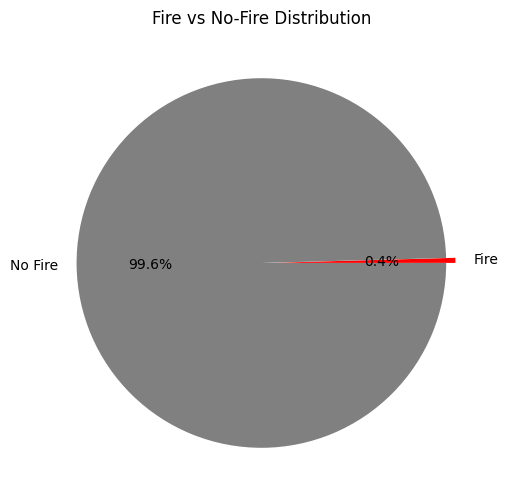

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie([nb_fire, nb_no_fire],
        labels=["Fire", "No Fire"],
        autopct="%1.1f%%",
        explode=(0.05, 0),
        colors=["red", "grey"])

plt.title("Fire vs No-Fire Distribution")
plt.show()


In [15]:
import pandas as pd
import geopandas as gpd

# 1) Charger le fichier fire filtré (type = 0)
fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_2024_type0.csv"
fire = pd.read_csv(fire_path)

# 2) Convertir en GeoDataFrame WGS84
gdf_fire = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs=4326
)

# 3) Reprojection en EPSG:3857 (mètres)
gdf_fire_m = gdf_fire.to_crs(3857)
print("✔ Fire chargé et reprojeté :", gdf_fire_m.crs)
print("Nombre de points feu :", len(gdf_fire_m))


# =============================
#    SPATIAL JOIN FEUX
# =============================

# fire → cellules
fire_with_cell = gpd.sjoin(gdf_fire_m, grid_clipped, how="inner", predicate="within")

# Garder TOUS les feux dans chaque cellule
fire_all_cells = fire_with_cell.copy()
fire_all_cells["fire"] = 1

fire_all_cells = fire_all_cells[["geometry", "fire", "index_right"]]

print("\nAperçu des feux assignés :")
print(fire_all_cells.head())
print("Nombre total de feux :", len(fire_all_cells))


# =============================
#    CRÉATION DES NON-FEUX
# =============================

# Cellules contenant au moins un feu
fire_cells = set(fire_all_cells["index_right"])

# Cellules sans feu
non_fire_cells = grid_clipped[~grid_clipped.index.isin(fire_cells)]

# Remplacer polygone → centroïde
non_fire = non_fire_cells.copy()
non_fire["geometry"] = non_fire.geometry.centroid
non_fire["fire"] = 0

print("Nombre de non-feux :", len(non_fire))


# =============================
#    FUSION FINALE
# =============================

final_points = pd.concat([
    fire_all_cells[["geometry", "fire"]],
    non_fire[["geometry", "fire"]]
], ignore_index=True)

# Conversion en WGS84 pour longitude/latitude
final_points = gpd.GeoDataFrame(final_points, geometry="geometry", crs=3857).to_crs(4326)

# Extraire lat/lon
final_points["longitude"] = final_points.geometry.x
final_points["latitude"] = final_points.geometry.y

# Supprimer geometry pour créer un CSV léger
final_points = final_points.drop(columns=["geometry"])

print("\nAperçu final :")
print(final_points.head())
print("Nombre total de lignes :", len(final_points))


# =============================
#    SAUVEGARDE DU DATASET FINAL
# =============================

output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final2.csv"
final_points.to_csv(output_path, index=False)

print("\n✔ Dataset final sauvegardé !")
print("📁 Emplacement :", output_path)
print("Total :", len(final_points), "lignes")


✔ Fire chargé et reprojeté : EPSG:3857
Nombre de points feu : 14216


NameError: name 'grid_clipped' is not defined

In [4]:
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final2.csv"
final_points.to_csv(output_path, index=False)

print("\n✔ Dataset final sauvegardé !")
print("📁 Emplacement :", output_path)
print("Total :", len(final_points), "lignes")

NameError: name 'final_points' is not defined

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


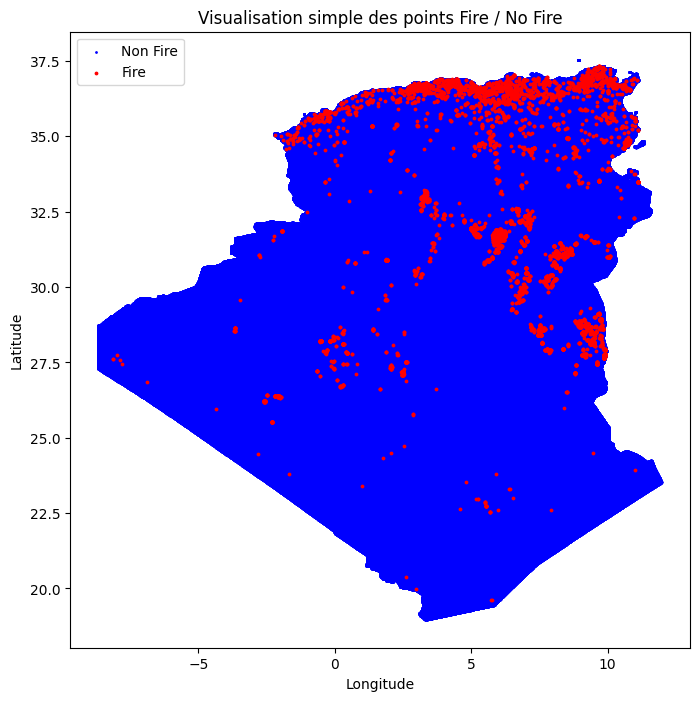

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv2"
df = pd.read_csv(path)

# Séparer feux et non-feux
fires = df[df["fire"] == 1]
non_fires = df[df["fire"] == 0]

# --- VISUALISATION SIMPLE ---
plt.figure(figsize=(8, 8))

plt.scatter(non_fires["longitude"], non_fires["latitude"],
            s=1, color="blue", label="Non Fire")

plt.scatter(fires["longitude"], fires["latitude"],
            s=3, color="red", label="Fire")

plt.title("Visualisation simple des points Fire / No Fire")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.show()


<Figure size 700x700 with 0 Axes>

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


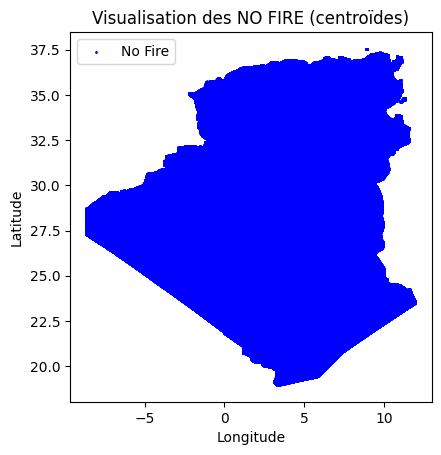

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger ton dataset final
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv2"
df = pd.read_csv(path)

# Convertir en GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs=4326
)

# Filtrer uniquement NO FIRE
nofire = gdf[gdf.fire == 0]

# --- Visualisation ---
plt.figure(figsize=(7, 7))
nofire.plot(markersize=1, color="blue", label="No Fire")

plt.title("Visualisation des NO FIRE (centroïdes)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [7]:
import pandas as pd

# Charger ton dataset final
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv2"
df = pd.read_csv(path)

# Séparer les classes
fire = df[df["fire"] == 1]
non_fire = df[df["fire"] == 0]

print("Avant équilibrage :")
print("Fire :", len(fire))
print("No Fire :", len(non_fire))

# UNDERSAMPLING : réduire No Fire
non_fire_sample = non_fire.sample(n=len(fire), random_state=42)

df_balanced = pd.concat([fire, non_fire_sample], ignore_index=True)

print("\nAprès équilibrage :")
print("Fire :", sum(df_balanced["fire"]==1))
print("No Fire :", sum(df_balanced["fire"]==0))

# Sauvegarde
df_balanced.to_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_balanced_undersample.csv", index=False)
print("\n✔ Dataset équilibré (undersampling) sauvegardé !")


Avant équilibrage :
Fire : 14216
No Fire : 3243407

Après équilibrage :
Fire : 14216
No Fire : 14216

✔ Dataset équilibré (undersampling) sauvegardé !


Avant équilibrage :
Feux : 14216
Non-Feux : 14216

Après équilibrage :
Feux : 14216
Non-Feux : 14216


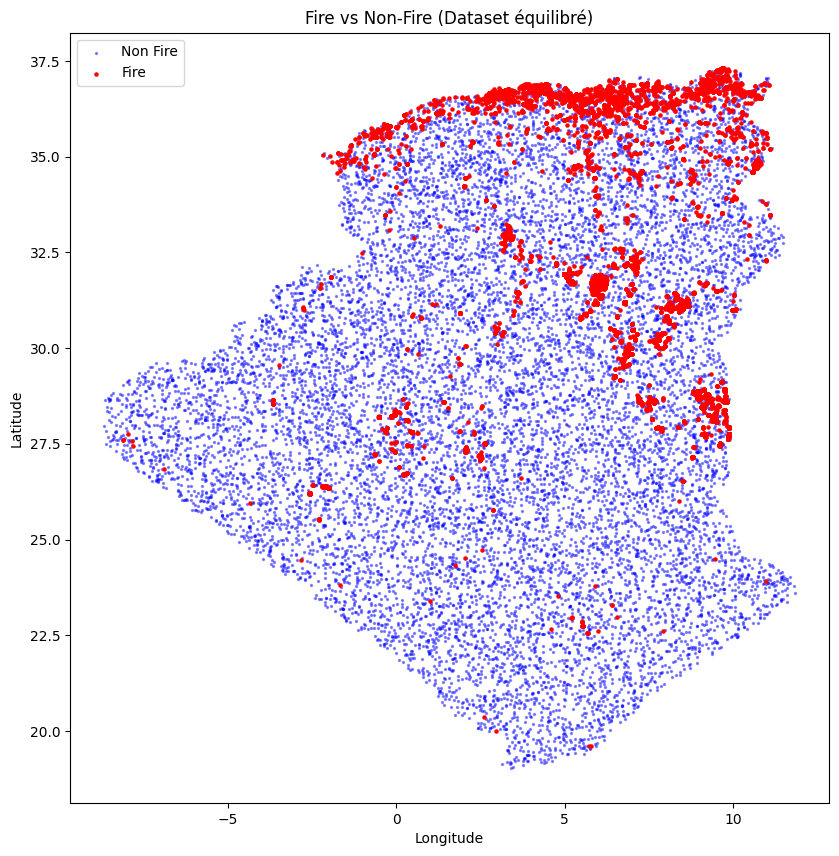

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ---------------------------
# 1) Charger le dataset final
# ---------------------------
df = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_balanced_undersample.csv")

# Séparer les classes
fire = df[df["fire"] == 1]
non_fire = df[df["fire"] == 0]

print("Avant équilibrage :")
print("Feux :", len(fire))
print("Non-Feux :", len(non_fire))

# ---------------------------
# 2) Undersampling (équilibrage)
# ---------------------------
non_fire_sample = non_fire.sample(n=len(fire), random_state=42)

df_balanced = pd.concat([fire, non_fire_sample], ignore_index=True)

print("\nAprès équilibrage :")
print("Feux :", sum(df_balanced["fire"]==1))
print("Non-Feux :", sum(df_balanced["fire"]==0))

# Convertir en GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_balanced,
    geometry=gpd.points_from_xy(df_balanced.longitude, df_balanced.latitude),
    crs=4326
)

# ---------------------------
# 3) Visualisation sur carte
# ---------------------------
plt.figure(figsize=(10, 10))

# Non-feux
gdf[gdf.fire == 0].plot(
    ax=plt.gca(),
    markersize=2,
    color="blue",
    alpha=0.4,
    label="Non Fire"
)

# Feux
gdf[gdf.fire == 1].plot(
    ax=plt.gca(),
    markersize=5,
    color="red",
    label="Fire"
)

plt.legend()
plt.title("Fire vs Non-Fire (Dataset équilibré)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [30]:
import os
import numpy as np
import rasterio

climate_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped"


In [31]:
def load_raster_stack(directory, prefix):
    files = sorted([f for f in os.listdir(directory) if prefix in f and f.endswith(".tif")])
    print(f"{prefix} → {len(files)} fichiers trouvés")

    stack = []
    for f in files:
        path = os.path.join(directory, f)
        with rasterio.open(path) as src:
            data = src.read(1).astype(float)
            if src.nodata is not None:
                data[data == src.nodata] = np.nan
            stack.append(data)

    return np.array(stack), files


In [32]:
stack_prec, prec_files = load_raster_stack(climate_dir, "prec_2024")
stack_tmax, tmax_files = load_raster_stack(climate_dir, "tmax_2024")
stack_tmin, tmin_files = load_raster_stack(climate_dir, "tmin_2024")


prec_2024 → 12 fichiers trouvés
tmax_2024 → 12 fichiers trouvés
tmin_2024 → 12 fichiers trouvés


In [33]:
DJF = [11, 0, 1]
MAM = [2, 3, 4]
JJA = [5, 6, 7]
SON = [8, 9, 10]


In [34]:
print(stack_prec.shape)
print(stack_tmax.shape)
print(stack_tmin.shape)


(12, 224, 249)
(12, 224, 249)
(12, 224, 249)


In [38]:
prec_DJF = np.nansum(stack_prec[DJF, :, :], axis=0)
prec_MAM = np.nansum(stack_prec[MAM, :, :], axis=0)
prec_JJA = np.nansum(stack_prec[JJA, :, :], axis=0)
prec_SON = np.nansum(stack_prec[SON, :, :], axis=0)

print("PREC saisons calculées !")


PREC saisons calculées !


In [39]:
tmax_DJF = np.nanmean(stack_tmax[DJF, :, :], axis=0)
tmax_MAM = np.nanmean(stack_tmax[MAM, :, :], axis=0)
tmax_JJA = np.nanmean(stack_tmax[JJA, :, :], axis=0)
tmax_SON = np.nanmean(stack_tmax[SON, :, :], axis=0)

print("TMAX saisons calculées !")


TMAX saisons calculées !


C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\3468483950.py:1: RuntimeWarning: Mean of empty slice
  tmax_DJF = np.nanmean(stack_tmax[DJF, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\3468483950.py:2: RuntimeWarning: Mean of empty slice
  tmax_MAM = np.nanmean(stack_tmax[MAM, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\3468483950.py:3: RuntimeWarning: Mean of empty slice
  tmax_JJA = np.nanmean(stack_tmax[JJA, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\3468483950.py:4: RuntimeWarning: Mean of empty slice
  tmax_SON = np.nanmean(stack_tmax[SON, :, :], axis=0)


In [40]:
tmin_DJF = np.nanmean(stack_tmin[DJF, :, :], axis=0)
tmin_MAM = np.nanmean(stack_tmin[MAM, :, :], axis=0)
tmin_JJA = np.nanmean(stack_tmin[JJA, :, :], axis=0)
tmin_SON = np.nanmean(stack_tmin[SON, :, :], axis=0)

print("TMIN saisons calculées !")


TMIN saisons calculées !


C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\953305667.py:1: RuntimeWarning: Mean of empty slice
  tmin_DJF = np.nanmean(stack_tmin[DJF, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\953305667.py:2: RuntimeWarning: Mean of empty slice
  tmin_MAM = np.nanmean(stack_tmin[MAM, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\953305667.py:3: RuntimeWarning: Mean of empty slice
  tmin_JJA = np.nanmean(stack_tmin[JJA, :, :], axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\953305667.py:4: RuntimeWarning: Mean of empty slice
  tmin_SON = np.nanmean(stack_tmin[SON, :, :], axis=0)


In [41]:
# === 1. Définir le dossier de sortie ===
output_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal"
os.makedirs(output_dir, exist_ok=True)

# === 2. Définir le raster de référence ===
reference_raster = os.path.join(climate_dir, prec_files[0])
print("Reference raster :", reference_raster)

# === 3. Fonction de sauvegarde ===
import rasterio

def save_raster(reference_path, output_path, array):
    with rasterio.open(reference_path) as ref:
        profile = ref.profile
        profile.update(dtype=rasterio.float32, count=1)

    with rasterio.open(output_path, "w", **profile) as dst:
        dst.write(array.astype(rasterio.float32), 1)

    print("✔ Sauvegardé :", output_path)

# === 4. Sauvegarde des saisons ===

# --- PRECIPITATION ---
save_raster(reference_raster, os.path.join(output_dir, "prec_DJF.tif"), prec_DJF)
save_raster(reference_raster, os.path.join(output_dir, "prec_MAM.tif"), prec_MAM)
save_raster(reference_raster, os.path.join(output_dir, "prec_JJA.tif"), prec_JJA)
save_raster(reference_raster, os.path.join(output_dir, "prec_SON.tif"), prec_SON)

# --- TMAX ---
save_raster(reference_raster, os.path.join(output_dir, "tmax_DJF.tif"), tmax_DJF)
save_raster(reference_raster, os.path.join(output_dir, "tmax_MAM.tif"), tmax_MAM)
save_raster(reference_raster, os.path.join(output_dir, "tmax_JJA.tif"), tmax_JJA)
save_raster(reference_raster, os.path.join(output_dir, "tmax_SON.tif"), tmax_SON)

# --- TMIN ---
save_raster(reference_raster, os.path.join(output_dir, "tmin_DJF.tif"), tmin_DJF)
save_raster(reference_raster, os.path.join(output_dir, "tmin_MAM.tif"), tmin_MAM)
save_raster(reference_raster, os.path.join(output_dir, "tmin_JJA.tif"), tmin_JJA)
save_raster(reference_raster, os.path.join(output_dir, "tmin_SON.tif"), tmin_SON)


Reference raster : C:\Users\DELL\Desktop\project_fire\data\processed\climate_clipped\wc2.1_cruts4.09_5m_prec_2024-01.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\prec_DJF.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\prec_MAM.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\prec_JJA.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\prec_SON.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\tmax_DJF.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\tmax_MAM.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\tmax_JJA.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\tmax_SON.tif
✔ Sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\tmin_DJF.tif
✔ Sauvegardé : C:\Users\

In [42]:
def check_nan(name, array):
    nan_count = np.isnan(array).sum()
    total = array.size
    print(f"{name} → Missing: {nan_count} pixels ({nan_count/total*100:.2f}%)")

check_nan("prec_DJF", prec_DJF)
check_nan("prec_MAM", prec_MAM)
check_nan("prec_JJA", prec_JJA)
check_nan("prec_SON", prec_SON)

check_nan("tmax_DJF", tmax_DJF)
check_nan("tmax_MAM", tmax_MAM)
check_nan("tmax_JJA", tmax_JJA)
check_nan("tmax_SON", tmax_SON)

check_nan("tmin_DJF", tmin_DJF)
check_nan("tmin_MAM", tmin_MAM)
check_nan("tmin_JJA", tmin_JJA)
check_nan("tmin_SON", tmin_SON)


prec_DJF → Missing: 0 pixels (0.00%)
prec_MAM → Missing: 0 pixels (0.00%)
prec_JJA → Missing: 0 pixels (0.00%)
prec_SON → Missing: 0 pixels (0.00%)
tmax_DJF → Missing: 22985 pixels (41.21%)
tmax_MAM → Missing: 22985 pixels (41.21%)
tmax_JJA → Missing: 22985 pixels (41.21%)
tmax_SON → Missing: 22985 pixels (41.21%)
tmin_DJF → Missing: 22985 pixels (41.21%)
tmin_MAM → Missing: 22985 pixels (41.21%)
tmin_JJA → Missing: 22985 pixels (41.21%)
tmin_SON → Missing: 22985 pixels (41.21%)


In [3]:
# ============================================================================
# TRAITEMENT DES VALEURS MANQUANTES DANS LES DONNÉES CLIMATIQUES
# ============================================================================

import numpy as np
import rasterio
import os

# ============================================================================
# 1. CHARGEMENT DES DONNÉES SAISONNIÈRES
# ============================================================================

climate_seasonal_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal"
output_clean_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_cleaned"
os.makedirs(output_clean_dir, exist_ok=True)

# Liste des fichiers saisonniers
seasonal_files = [
    "prec_DJF.tif", "prec_MAM.tif", "prec_JJA.tif", "prec_SON.tif",
    "tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
    "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"
]

# Fonction pour charger un raster
def load_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1).astype(float)
        profile = src.profile
        # Convertir les nodata en NaN
        if src.nodata is not None:
            data[data == src.nodata] = np.nan
        return data, profile

# ============================================================================
# 2. ANALYSE DES DONNÉES MANQUANTES
# ============================================================================

print("="*60)
print("ANALYSE DES VALEURS MANQUANTES AVANT TRAITEMENT")
print("="*60)

# Charger tous les rasters et analyser les NaN
raster_data = {}
for file in seasonal_files:
    file_path = os.path.join(climate_seasonal_dir, file)
    data, profile = load_raster(file_path)
    raster_data[file] = {'data': data, 'profile': profile}
    
    nan_count = np.isnan(data).sum()
    total_pixels = data.size
    nan_percent = (nan_count / total_pixels) * 100
    
    print(f"{file:15} → {nan_count:6d} pixels manquants ({nan_percent:.2f}%)")

# ============================================================================
# 3. IDENTIFICATION DES PIXELS MANQUANTS COMMUNS
# ============================================================================

print("\n" + "="*60)
print("IDENTIFICATION DES ZONES COMMUNES DE DONNÉES MANQUANTES")
print("="*60)

# Créer un masque des pixels où AU MOINS UNE variable a des NaN
missing_mask = np.zeros_like(raster_data["prec_DJF.tif"]['data'], dtype=bool)

for file in seasonal_files:
    data = raster_data[file]['data']
    missing_mask = missing_mask | np.isnan(data)

total_common_missing = missing_mask.sum()
total_pixels = missing_mask.size
common_missing_percent = (total_common_missing / total_pixels) * 100

print(f"Pixels avec au moins une donnée manquante : {total_common_missing} ({common_missing_percent:.2f}%)")

# ============================================================================
# 4. STRATÉGIES DE TRAITEMENT DES NaN
# ============================================================================

print("\n" + "="*60)
print("APPLICATION DES TECHNIQUES D'IMPUTATION")
print("="*60)

def impute_missing_values(data, method='mean', mask=None):
    """
    Impute les valeurs manquantes selon différentes méthodes
    
    Args:
        data: array numpy avec NaN
        method: 'mean', 'median', 'nearest', 'linear'
        mask: masque des pixels à traiter (None = tous les NaN)
    """
    data_imputed = data.copy()
    
    if mask is None:
        mask = np.isnan(data)
    
    if not np.any(mask):
        return data_imputed
    
    if method == 'mean':
        # Imputation par la moyenne globale (pour comparaison)
        global_mean = np.nanmean(data)
        data_imputed[mask] = global_mean
        return data_imputed
        
    elif method == 'spatial_mean':
        # Imputation par moyenne spatiale locale (voisinage 3x3)
        from scipy.ndimage import generic_filter
        
        def local_mean(window):
            valid_vals = window[~np.isnan(window)]
            if len(valid_vals) > 0:
                return np.mean(valid_vals)
            else:
                return np.nan
        
        # Appliquer le filtre
        local_means = generic_filter(data, local_mean, size=3, mode='constant', cval=np.nan)
        
        # Remplacer les NaN par les moyennes locales si disponibles
        nan_mask = np.isnan(data_imputed)
        local_means_mask = ~np.isnan(local_means) & nan_mask
        data_imputed[local_means_mask] = local_means[local_means_mask]
        
        # Pour les pixels restants, utiliser la moyenne globale
        remaining_nan = np.isnan(data_imputed)
        if np.any(remaining_nan):
            global_mean = np.nanmean(data_imputed)
            data_imputed[remaining_nan] = global_mean
            
        return data_imputed
    
    elif method == 'interpolate':
        # Interpolation spatiale (plus sophistiquée)
        from scipy.interpolate import griddata
        
        # Créer une grille de coordonnées
        ny, nx = data.shape
        x = np.arange(nx)
        y = np.arange(ny)
        xx, yy = np.meshgrid(x, y)
        
        # Points avec des valeurs connues
        known_mask = ~np.isnan(data)
        points = np.column_stack([xx[known_mask], yy[known_mask]])
        values = data[known_mask]
        
        # Points à interpoler
        unknown_mask = np.isnan(data)
        points_to_interp = np.column_stack([xx[unknown_mask], yy[unknown_mask]])
        
        if len(points_to_interp) > 0:
            # Interpolation linéaire
            interp_values = griddata(points, values, points_to_interp, method='linear')
            
            # Pour les points hors convex hull, utiliser la méthode nearest
            nan_in_interp = np.isnan(interp_values)
            if np.any(nan_in_interp):
                nearest_values = griddata(points, values, points_to_interp[nan_in_interp], method='nearest')
                interp_values[nan_in_interp] = nearest_values
            
            data_imputed[unknown_mask] = interp_values
        
        return data_imputed
    
    else:
        raise ValueError(f"Méthode non reconnue: {method}")

# ============================================================================
# 5. APPLICATION DU TRAITEMENT PAR CATÉGORIE
# ============================================================================

print("\nTraitement des précipitations (faible % de NaN)...")
# Pour précipitations - peu de NaN, imputation simple
for prec_file in ["prec_DJF.tif", "prec_MAM.tif", "prec_JJA.tif", "prec_SON.tif"]:
    data = raster_data[prec_file]['data']
    data_clean = impute_missing_values(data, method='mean')
    raster_data[prec_file]['data_clean'] = data_clean
    print(f"  {prec_file} : {np.isnan(data).sum()} → {np.isnan(data_clean).sum()} NaN")

print("\nTraitement des températures (TMAX et TMIN)...")
# Pour températures - beaucoup de NaN, besoin d'approche spatiale
for temp_file in ["tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
                  "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"]:
    
    data = raster_data[temp_file]['data']
    
    # Vérifier la distribution des données avant imputation
    valid_data = data[~np.isnan(data)]
    print(f"\n  {temp_file}:")
    print(f"    Données valides: {len(valid_data)} pixels")
    print(f"    Valeur moyenne: {np.mean(valid_data):.2f}")
    print(f"    Écart-type: {np.std(valid_data):.2f}")
    print(f"    Min/Max: {np.min(valid_data):.2f}/{np.max(valid_data):.2f}")
    
    # Imputation spatiale
    data_clean = impute_missing_values(data, method='spatial_mean')
    
    # Vérifier la qualité de l'imputation
    nan_before = np.isnan(data).sum()
    nan_after = np.isnan(data_clean).sum()
    
    raster_data[temp_file]['data_clean'] = data_clean
    print(f"    NaN avant/après: {nan_before} → {nan_after}")

# ============================================================================
# 6. CONTRÔLE DE QUALITÉ APRÈS IMPUTATION
# ============================================================================

print("\n" + "="*60)
print("CONTRÔLE DE QUALITÉ APRÈS TRAITEMENT")
print("="*60)

# Vérifier qu'il n'y a plus de NaN
all_clean = True
for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    nan_count = np.isnan(data_clean).sum()
    
    if nan_count > 0:
        print(f"⚠️  {file:15} → {nan_count} NaN restants")
        all_clean = False
    else:
        print(f"✓  {file:15} → 0 NaN (propre)")

if all_clean:
    print("\n✅ Toutes les données sont complètes !")
else:
    print("\n⚠️  Certaines données contiennent encore des valeurs manquantes")

# ============================================================================
# 7. ANALYSE STATISTIQUE POST-TRAITEMENT
# ============================================================================

print("\n" + "="*60)
print("STATISTIQUES POST-TRAITEMENT")
print("="*60)

for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    
    mean_val = np.mean(data_clean)
    std_val = np.std(data_clean)
    min_val = np.min(data_clean)
    max_val = np.max(data_clean)
    
    print(f"{file:15} → Moyenne: {mean_val:7.2f} ± {std_val:5.2f}  "
          f"Range: [{min_val:6.2f}, {max_val:6.2f}]")

# ============================================================================
# 8. SAUVEGARDE DES DONNÉES NETTOYÉES
# ============================================================================

print("\n" + "="*60)
print("SAUVEGARDE DES DONNÉES NETTOYÉES")
print("="*60)

def save_clean_raster(file_name, data, profile, output_dir):
    output_path = os.path.join(output_dir, file_name)
    
    # Mettre à jour le profile
    profile_clean = profile.copy()
    profile_clean.update({
        'dtype': 'float32',
        'nodata': None  # Pas de nodata car tout est rempli
    })
    
    with rasterio.open(output_path, 'w', **profile_clean) as dst:
        dst.write(data.astype(np.float32), 1)
    
    print(f"✓  {file_name} sauvegardé")
    return output_path

# Sauvegarder tous les rasters nettoyés
cleaned_files = []
for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    profile = raster_data[file]['profile']
    
    output_path = save_clean_raster(f"clean_{file}", data_clean, profile, output_clean_dir)
    cleaned_files.append(output_path)

# ============================================================================
# 9. CRÉATION D'UN MASQUE DE QUALITÉ
# ============================================================================

print("\n" + "="*60)
print("CRÉATION D'UN MASQUE DE QUALITÉ DES DONNÉES")
print("="*60)

# Créer un masque indiquant les pixels qui avaient des données manquantes à l'origine
quality_mask = np.zeros_like(raster_data["prec_DJF.tif"]['data'], dtype=np.uint8)

# 0 = données originales complètes
# 1 = données imputées (qualité réduite)
# 2 = données fortement interpolées

# Identifier les pixels qui avaient des NaN dans les données de température
temp_nan_original = np.zeros_like(quality_mask, dtype=bool)
for temp_file in ["tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
                  "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"]:
    temp_nan_original = temp_nan_original | np.isnan(raster_data[temp_file]['data'])

# Appliquer le masque de qualité
quality_mask[temp_nan_original] = 1

# Compter les catégories
unique, counts = np.unique(quality_mask, return_counts=True)
for val, count in zip(unique, counts):
    percent = (count / quality_mask.size) * 100
    if val == 0:
        print(f"Pixels avec données originales: {count} ({percent:.2f}%)")
    elif val == 1:
        print(f"Pixels avec données imputées: {count} ({percent:.2f}%)")

# Sauvegarder le masque de qualité
quality_mask_path = os.path.join(output_clean_dir, "data_quality_mask.tif")
profile_mask = raster_data["prec_DJF.tif"]['profile'].copy()
profile_mask.update(dtype='uint8', nodata=None)

with rasterio.open(quality_mask_path, 'w', **profile_mask) as dst:
    dst.write(quality_mask, 1)

print(f"\n✓  Masque de qualité sauvegardé: {quality_mask_path}")

# ============================================================================
# 10. RAPPORT FINAL
# ============================================================================

print("\n" + "="*60)
print("RAPPORT FINAL DU NETTOYAGE")
print("="*60)

total_pixels = raster_data["prec_DJF.tif"]['data'].size
print(f"Résolution spatiale: {raster_data['prec_DJF.tif']['data'].shape}")
print(f"Total de pixels par raster: {total_pixels}")

print("\nRésumé du traitement:")
print(f"- Précipitations: 4 rasters saisonniers, imputation par moyenne globale")
print(f"- Températures (TMAX/TMIN): 8 rasters saisonniers, imputation spatiale (moyenne locale 3x3)")
print(f"- Données sauvegardées dans: {output_clean_dir}")
print(f"- Masque de qualité généré pour tracer les zones interpolées")

print("\n✅ Traitement des valeurs manquantes terminé avec succès !")

ANALYSE DES VALEURS MANQUANTES AVANT TRAITEMENT
prec_DJF.tif    →      0 pixels manquants (0.00%)
prec_MAM.tif    →      0 pixels manquants (0.00%)
prec_JJA.tif    →      0 pixels manquants (0.00%)
prec_SON.tif    →      0 pixels manquants (0.00%)
tmax_DJF.tif    →  22985 pixels manquants (41.21%)
tmax_MAM.tif    →  22985 pixels manquants (41.21%)
tmax_JJA.tif    →  22985 pixels manquants (41.21%)
tmax_SON.tif    →  22985 pixels manquants (41.21%)
tmin_DJF.tif    →  22985 pixels manquants (41.21%)
tmin_MAM.tif    →  22985 pixels manquants (41.21%)
tmin_JJA.tif    →  22985 pixels manquants (41.21%)
tmin_SON.tif    →  22985 pixels manquants (41.21%)

IDENTIFICATION DES ZONES COMMUNES DE DONNÉES MANQUANTES
Pixels avec au moins une donnée manquante : 22985 (41.21%)

APPLICATION DES TECHNIQUES D'IMPUTATION

Traitement des précipitations (faible % de NaN)...
  prec_DJF.tif : 0 → 0 NaN
  prec_MAM.tif : 0 → 0 NaN
  prec_JJA.tif : 0 → 0 NaN
  prec_SON.tif : 0 → 0 NaN

Traitement des température

In [6]:
# ============================================================================
# TRAITEMENT DES VALEURS MANQUANTES DANS LES DONNÉES CLIMATIQUES
# ============================================================================
import pandas as pd
import numpy as np
import rasterio
import os

# ============================================================================
# 1. CONFIGURATION DES CHEMINS
# ============================================================================

# Chemins d'entrée et de sortie
climate_seasonal_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal"
output_clean_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_cleaned"
output_masks_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\masks"

# Créer les répertoires de sortie
os.makedirs(output_clean_dir, exist_ok=True)
os.makedirs(output_masks_dir, exist_ok=True)  # <-- NOUVEAU : répertoire pour les masques

print(f"Répertoire de sortie des données nettoyées : {output_clean_dir}")
print(f"Répertoire de sortie des masques : {output_masks_dir}")  # <-- NOUVEAU

# Liste des fichiers saisonniers
seasonal_files = [
    "prec_DJF.tif", "prec_MAM.tif", "prec_JJA.tif", "prec_SON.tif",
    "tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
    "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"
]

# Fonction pour charger un raster
def load_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1).astype(float)
        profile = src.profile
        # Convertir les nodata en NaN
        if src.nodata is not None:
            data[data == src.nodata] = np.nan
        return data, profile

# ============================================================================
# 2. ANALYSE DES DONNÉES MANQUANTES
# ============================================================================

print("="*60)
print("ANALYSE DES VALEURS MANQUANTES AVANT TRAITEMENT")
print("="*60)

# Charger tous les rasters et analyser les NaN
raster_data = {}
for file in seasonal_files:
    file_path = os.path.join(climate_seasonal_dir, file)
    data, profile = load_raster(file_path)
    raster_data[file] = {'data': data, 'profile': profile}
    
    nan_count = np.isnan(data).sum()
    total_pixels = data.size
    nan_percent = (nan_count / total_pixels) * 100
    
    print(f"{file:15} → {nan_count:6d} pixels manquants ({nan_percent:.2f}%)")

# ============================================================================
# 3. IDENTIFICATION DES PIXELS MANQUANTS COMMUNS
# ============================================================================

print("\n" + "="*60)
print("IDENTIFICATION DES ZONES COMMUNES DE DONNÉES MANQUANTES")
print("="*60)

# Créer un masque des pixels où AU MOINS UNE variable a des NaN
missing_mask = np.zeros_like(raster_data["prec_DJF.tif"]['data'], dtype=bool)

for file in seasonal_files:
    data = raster_data[file]['data']
    missing_mask = missing_mask | np.isnan(data)

total_common_missing = missing_mask.sum()
total_pixels = missing_mask.size
common_missing_percent = (total_common_missing / total_pixels) * 100

print(f"Pixels avec au moins une donnée manquante : {total_common_missing} ({common_missing_percent:.2f}%)")

# ============================================================================
# 4. STRATÉGIES DE TRAITEMENT DES NaN
# ============================================================================

print("\n" + "="*60)
print("APPLICATION DES TECHNIQUES D'IMPUTATION")
print("="*60)

def impute_missing_values(data, method='mean', mask=None):
    """
    Impute les valeurs manquantes selon différentes méthodes
    
    Args:
        data: array numpy avec NaN
        method: 'mean', 'median', 'nearest', 'linear'
        mask: masque des pixels à traiter (None = tous les NaN)
    """
    data_imputed = data.copy()
    
    if mask is None:
        mask = np.isnan(data)
    
    if not np.any(mask):
        return data_imputed
    
    if method == 'mean':
        # Imputation par la moyenne globale (pour comparaison)
        global_mean = np.nanmean(data)
        data_imputed[mask] = global_mean
        return data_imputed
        
    elif method == 'spatial_mean':
        # Imputation par moyenne spatiale locale (voisinage 3x3)
        from scipy.ndimage import generic_filter
        
        def local_mean(window):
            valid_vals = window[~np.isnan(window)]
            if len(valid_vals) > 0:
                return np.mean(valid_vals)
            else:
                return np.nan
        
        # Appliquer le filtre
        local_means = generic_filter(data, local_mean, size=3, mode='constant', cval=np.nan)
        
        # Remplacer les NaN par les moyennes locales si disponibles
        nan_mask = np.isnan(data_imputed)
        local_means_mask = ~np.isnan(local_means) & nan_mask
        data_imputed[local_means_mask] = local_means[local_means_mask]
        
        # Pour les pixels restants, utiliser la moyenne globale
        remaining_nan = np.isnan(data_imputed)
        if np.any(remaining_nan):
            global_mean = np.nanmean(data_imputed)
            data_imputed[remaining_nan] = global_mean
            
        return data_imputed
    
    elif method == 'interpolate':
        # Interpolation spatiale (plus sophistiquée)
        from scipy.interpolate import griddata
        
        # Créer une grille de coordonnées
        ny, nx = data.shape
        x = np.arange(nx)
        y = np.arange(ny)
        xx, yy = np.meshgrid(x, y)
        
        # Points avec des valeurs connues
        known_mask = ~np.isnan(data)
        points = np.column_stack([xx[known_mask], yy[known_mask]])
        values = data[known_mask]
        
        # Points à interpoler
        unknown_mask = np.isnan(data)
        points_to_interp = np.column_stack([xx[unknown_mask], yy[unknown_mask]])
        
        if len(points_to_interp) > 0:
            # Interpolation linéaire
            interp_values = griddata(points, values, points_to_interp, method='linear')
            
            # Pour les points hors convex hull, utiliser la méthode nearest
            nan_in_interp = np.isnan(interp_values)
            if np.any(nan_in_interp):
                nearest_values = griddata(points, values, points_to_interp[nan_in_interp], method='nearest')
                interp_values[nan_in_interp] = nearest_values
            
            data_imputed[unknown_mask] = interp_values
        
        return data_imputed
    
    else:
        raise ValueError(f"Méthode non reconnue: {method}")

# ============================================================================
# 5. APPLICATION DU TRAITEMENT PAR CATÉGORIE
# ============================================================================

print("\nTraitement des précipitations (faible % de NaN)...")
# Pour précipitations - peu de NaN, imputation simple
for prec_file in ["prec_DJF.tif", "prec_MAM.tif", "prec_JJA.tif", "prec_SON.tif"]:
    data = raster_data[prec_file]['data']
    data_clean = impute_missing_values(data, method='mean')
    raster_data[prec_file]['data_clean'] = data_clean
    print(f"  {prec_file} : {np.isnan(data).sum()} → {np.isnan(data_clean).sum()} NaN")

print("\nTraitement des températures (TMAX et TMIN)...")
# Pour températures - beaucoup de NaN, besoin d'approche spatiale
for temp_file in ["tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
                  "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"]:
    
    data = raster_data[temp_file]['data']
    
    # Vérifier la distribution des données avant imputation
    valid_data = data[~np.isnan(data)]
    print(f"\n  {temp_file}:")
    print(f"    Données valides: {len(valid_data)} pixels")
    print(f"    Valeur moyenne: {np.mean(valid_data):.2f}")
    print(f"    Écart-type: {np.std(valid_data):.2f}")
    print(f"    Min/Max: {np.min(valid_data):.2f}/{np.max(valid_data):.2f}")
    
    # Imputation spatiale
    data_clean = impute_missing_values(data, method='spatial_mean')
    
    # Vérifier la qualité de l'imputation
    nan_before = np.isnan(data).sum()
    nan_after = np.isnan(data_clean).sum()
    
    raster_data[temp_file]['data_clean'] = data_clean
    print(f"    NaN avant/après: {nan_before} → {nan_after}")

# ============================================================================
# 6. CONTRÔLE DE QUALITÉ APRÈS IMPUTATION
# ============================================================================

print("\n" + "="*60)
print("CONTRÔLE DE QUALITÉ APRÈS TRAITEMENT")
print("="*60)

# Vérifier qu'il n'y a plus de NaN
all_clean = True
for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    nan_count = np.isnan(data_clean).sum()
    
    if nan_count > 0:
        print(f"⚠️  {file:15} → {nan_count} NaN restants")
        all_clean = False
    else:
        print(f"✓  {file:15} → 0 NaN (propre)")

if all_clean:
    print("\n✅ Toutes les données sont complètes !")
else:
    print("\n⚠️  Certaines données contiennent encore des valeurs manquantes")

# ============================================================================
# 7. ANALYSE STATISTIQUE POST-TRAITEMENT
# ============================================================================

print("\n" + "="*60)
print("STATISTIQUES POST-TRAITEMENT")
print("="*60)

for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    
    mean_val = np.mean(data_clean)
    std_val = np.std(data_clean)
    min_val = np.min(data_clean)
    max_val = np.max(data_clean)
    
    print(f"{file:15} → Moyenne: {mean_val:7.2f} ± {std_val:5.2f}  "
          f"Range: [{min_val:6.2f}, {max_val:6.2f}]")

# ============================================================================
# 8. SAUVEGARDE DES DONNÉES NETTOYÉES
# ============================================================================

print("\n" + "="*60)
print("SAUVEGARDE DES DONNÉES NETTOYÉES")
print("="*60)

def save_clean_raster(file_name, data, profile, output_dir):
    output_path = os.path.join(output_dir, file_name)
    
    # Mettre à jour le profile
    profile_clean = profile.copy()
    profile_clean.update({
        'dtype': 'float32',
        'nodata': None  # Pas de nodata car tout est rempli
    })
    
    with rasterio.open(output_path, 'w', **profile_clean) as dst:
        dst.write(data.astype(np.float32), 1)
    
    print(f"✓  {file_name} sauvegardé")
    return output_path

# Sauvegarder tous les rasters nettoyés
cleaned_files = []
for file in seasonal_files:
    data_clean = raster_data[file].get('data_clean', raster_data[file]['data'])
    profile = raster_data[file]['profile']
    
    output_path = save_clean_raster(f"clean_{file}", data_clean, profile, output_clean_dir)
    cleaned_files.append(output_path)

# ============================================================================
# 9. CRÉATION D'UN MASQUE DE QUALITÉ
# ============================================================================

print("\n" + "="*60)
print("CRÉATION ET SAUVEGARDE DES MASQUES DE QUALITÉ")
print("="*60)

# Créer un masque indiquant les pixels qui avaient des données manquantes à l'origine
quality_mask = np.zeros_like(raster_data["prec_DJF.tif"]['data'], dtype=np.uint8)

# 0 = données originales complètes
# 1 = données imputées (qualité réduite)

# Identifier les pixels qui avaient des NaN dans les données de température
temp_nan_original = np.zeros_like(quality_mask, dtype=bool)
for temp_file in ["tmax_DJF.tif", "tmax_MAM.tif", "tmax_JJA.tif", "tmax_SON.tif",
                  "tmin_DJF.tif", "tmin_MAM.tif", "tmin_JJA.tif", "tmin_SON.tif"]:
    temp_nan_original = temp_nan_original | np.isnan(raster_data[temp_file]['data'])

# Appliquer le masque de qualité
quality_mask[temp_nan_original] = 1

# Compter les catégories
unique, counts = np.unique(quality_mask, return_counts=True)
for val, count in zip(unique, counts):
    percent = (count / quality_mask.size) * 100
    if val == 0:
        print(f"Pixels avec données originales: {count} ({percent:.2f}%)")
    elif val == 1:
        print(f"Pixels avec données imputées: {count} ({percent:.2f}%)")

# ============================================================================
# 10. SAUVEGARDE DU MASQUE DE QUALITÉ (CHEMINS COMPLETS)
# ============================================================================

print("\n" + "-"*40)
print("SAUVEGARDE DES FICHIERS MASQUES")
print("-"*40)

# 10.1 Masque principal de qualité
quality_mask_path = os.path.join(output_masks_dir, "data_quality_mask.tif")
profile_mask = raster_data["prec_DJF.tif"]['profile'].copy()
profile_mask.update(dtype='uint8', nodata=None)

with rasterio.open(quality_mask_path, 'w', **profile_mask) as dst:
    dst.write(quality_mask, 1)

print(f"✓  Masque de qualité principal sauvegardé :")
print(f"   {quality_mask_path}")

# 10.2 Masque des données originales (seulement les pixels non modifiés)
original_data_mask = (quality_mask == 0).astype(np.uint8)
original_mask_path = os.path.join(output_masks_dir, "original_data_mask.tif")

with rasterio.open(original_mask_path, 'w', **profile_mask) as dst:
    dst.write(original_data_mask, 1)

print(f"✓  Masque des données originales sauvegardé :")
print(f"   {original_mask_path}")

# 10.3 Masque des données imputées (seulement les pixels modifiés)
imputed_data_mask = (quality_mask == 1).astype(np.uint8)
imputed_mask_path = os.path.join(output_masks_dir, "imputed_data_mask.tif")

with rasterio.open(imputed_mask_path, 'w', **profile_mask) as dst:
    dst.write(imputed_data_mask, 1)

print(f"✓  Masque des données imputées sauvegardé :")
print(f"   {imputed_mask_path}")

# 10.4 Masque binaire des données manquantes initiales
missing_data_mask = temp_nan_original.astype(np.uint8)
missing_mask_path = os.path.join(output_masks_dir, "initial_missing_mask.tif")

with rasterio.open(missing_mask_path, 'w', **profile_mask) as dst:
    dst.write(missing_data_mask, 1)

print(f"✓  Masque des données manquantes initiales sauvegardé :")
print(f"   {missing_mask_path}")

# 10.5 Fichier texte avec les statistiques des masques
stats_file_path = os.path.join(output_masks_dir, "mask_statistics.txt")
with open(stats_file_path, 'w') as f:
    f.write("STATISTIQUES DES MASQUES DE QUALITÉ\n")
    f.write("="*40 + "\n")
    f.write(f"Date de génération: {pd.Timestamp.now()}\n")
    f.write(f"Résolution spatiale: {quality_mask.shape}\n")
    f.write(f"Total de pixels: {quality_mask.size}\n\n")
    
    f.write("DISTRIBUTION DES CATÉGORIES:\n")
    f.write("-"*30 + "\n")
    for val, count in zip(unique, counts):
        percent = (count / quality_mask.size) * 100
        if val == 0:
            f.write(f"Données originales: {count} pixels ({percent:.2f}%)\n")
        elif val == 1:
            f.write(f"Données imputées: {count} pixels ({percent:.2f}%)\n")
    
    f.write("\nFICHIERS GÉNÉRÉS:\n")
    f.write("-"*30 + "\n")
    f.write(f"1. data_quality_mask.tif - Masque principal (0=original, 1=imputé)\n")
    f.write(f"2. original_data_mask.tif - Masque des données originales\n")
    f.write(f"3. imputed_data_mask.tif - Masque des données imputées\n")
    f.write(f"4. initial_missing_mask.tif - Masque des données manquantes initiales\n")
    f.write(f"5. mask_statistics.txt - Ce fichier de statistiques\n")

print(f"✓  Fichier de statistiques des masques sauvegardé :")
print(f"   {stats_file_path}")

# ============================================================================
# 11. RAPPORT FINAL
# ============================================================================

print("\n" + "="*60)
print("RAPPORT FINAL DU NETTOYAGE DES DONNÉES CLIMATIQUES")
print("="*60)

total_pixels = raster_data["prec_DJF.tif"]['data'].size
print(f"Résolution spatiale: {raster_data['prec_DJF.tif']['data'].shape}")
print(f"Total de pixels par raster: {total_pixels}")

print("\n" + "-"*40)
print("RÉSUMÉ DU TRAITEMENT:")
print("-"*40)
print(f"• Précipitations: 4 rasters saisonniers, imputation par moyenne globale")
print(f"• Températures (TMAX/TMIN): 8 rasters saisonniers, imputation spatiale (moyenne locale 3x3)")
print(f"• Données sauvegardées dans: {output_clean_dir}")
print(f"• Masques de qualité sauvegardés dans: {output_masks_dir}")

print("\n" + "-"*40)
print("FICHIERS GÉNÉRÉS:")
print("-"*40)
print(f"📁 {output_clean_dir}:")
print(f"   ├── 12 fichiers clean_*.tif (données climatiques nettoyées)")
print(f"\n📁 {output_masks_dir}:")
print(f"   ├── data_quality_mask.tif (masque principal)")
print(f"   ├── original_data_mask.tif (données originales)")
print(f"   ├── imputed_data_mask.tif (données imputées)")
print(f"   ├── initial_missing_mask.tif (données manquantes initiales)")
print(f"   └── mask_statistics.txt (statistiques détaillées)")

print("\n" + "-"*40)
print("STATISTIQUES FINALES:")
print("-"*40)
print(f"• Données originales: {counts[0]} pixels ({counts[0]/total_pixels*100:.2f}%)")
print(f"• Données imputées: {counts[1]} pixels ({counts[1]/total_pixels*100:.2f}%)")
print(f"• Taux d'imputation nécessaire: {common_missing_percent:.2f}%")

print("\n✅ Traitement des valeurs manquantes terminé avec succès !")

# ============================================================================
# 12. VÉRIFICATION FINALE
# ============================================================================

print("\n" + "="*60)
print("VÉRIFICATION DES FICHIERS GÉNÉRÉS")
print("="*60)

# Vérifier que tous les fichiers ont été créés
all_files = [
    *[os.path.join(output_clean_dir, f"clean_{file}") for file in seasonal_files],
    quality_mask_path,
    original_mask_path,
    imputed_mask_path,
    missing_mask_path,
    stats_file_path
]

missing_files = []
for file_path in all_files:
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / 1024  # Taille en KB
        print(f"✓  {os.path.basename(file_path):30} → {file_size:.1f} KB")
    else:
        missing_files.append(file_path)
        print(f"❌ {os.path.basename(file_path):30} → FICHIER MANQUANT")

if missing_files:
    print(f"\n⚠️  ATTENTION: {len(missing_files)} fichiers manquants !")
else:
    print(f"\n✅ TOUS les fichiers ont été générés avec succès !")

Répertoire de sortie des données nettoyées : C:\Users\DELL\Desktop\project_fire\data\processed\climate_cleaned
Répertoire de sortie des masques : C:\Users\DELL\Desktop\project_fire\data\processed\masks
ANALYSE DES VALEURS MANQUANTES AVANT TRAITEMENT
prec_DJF.tif    →      0 pixels manquants (0.00%)
prec_MAM.tif    →      0 pixels manquants (0.00%)
prec_JJA.tif    →      0 pixels manquants (0.00%)
prec_SON.tif    →      0 pixels manquants (0.00%)
tmax_DJF.tif    →  22985 pixels manquants (41.21%)
tmax_MAM.tif    →  22985 pixels manquants (41.21%)
tmax_JJA.tif    →  22985 pixels manquants (41.21%)
tmax_SON.tif    →  22985 pixels manquants (41.21%)
tmin_DJF.tif    →  22985 pixels manquants (41.21%)
tmin_MAM.tif    →  22985 pixels manquants (41.21%)
tmin_JJA.tif    →  22985 pixels manquants (41.21%)
tmin_SON.tif    →  22985 pixels manquants (41.21%)

IDENTIFICATION DES ZONES COMMUNES DE DONNÉES MANQUANTES
Pixels avec au moins une donnée manquante : 22985 (41.21%)

APPLICATION DES TECHNIQUE

✅ Fichier masque trouvé: C:\Users\DELL\Desktop\project_fire\data\processed\masks\data_quality_mask.tif

Informations du masque:
  Dimensions: (224, 249)
  Type de données: uint8
  CRS: EPSG:4326

Statistiques du masque:
  Données originales: 32791 pixels (58.79%)
  Données imputées: 22985 pixels (41.21%)

✅ Figure sauvegardée: C:\Users\DELL\Desktop\project_fire\reports\figures\quality_mask.png
   Taille: 249 x 224 pixels
   Résolution: 300 DPI


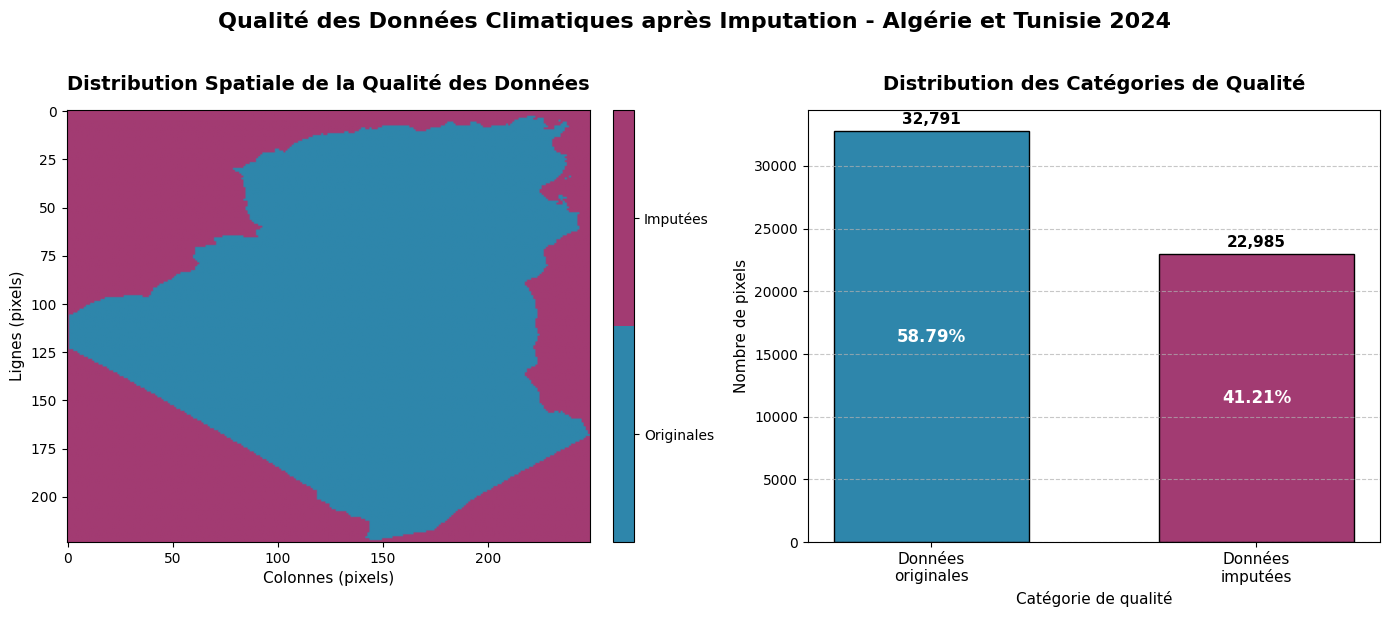


RAPPORT DE QUALITÉ DES DONNÉES

📊 Résumé statistique:
   • Total de pixels: 55,776
   • Pixels originaux: 32,791 (58.79%)
   • Pixels imputés: 22,985 (41.21%)

📍 Distribution spatiale:
   • Résolution: 249 x 224
   • Superficie par pixel: ~100 km² (résolution 10km)

📁 Fichiers disponibles:
   • Masque principal: C:\Users\DELL\Desktop\project_fire\data\processed\masks\data_quality_mask.tif
   • Figure générée: C:\Users\DELL\Desktop\project_fire\reports\figures\quality_mask.png

🎯 Autres masques disponibles dans C:\Users\DELL\Desktop\project_fire\data\processed\masks:
   • data_quality_mask.tif (55.0 KB)
   • imputed_data_mask.tif (55.0 KB)
   • initial_missing_mask.tif (55.0 KB)
   • original_data_mask.tif (55.0 KB)

✅ Figure générée avec succès !


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib.patches import Patch
import os

# ============================================================================
# 1. CHEMINS CORRIGÉS
# ============================================================================

# Chemins utilisant des raw strings ou des forward slashes
base_path = r"C:\Users\DELL\Desktop\project_fire"
quality_mask_path = os.path.join(base_path, "data", "processed", "masks", "data_quality_mask.tif")
figure_output_path = os.path.join(base_path, "reports", "figures", "quality_mask.png")

# Vérifier si le fichier existe
if not os.path.exists(quality_mask_path):
    print("❌ ERREUR: Le fichier masque n'existe pas à l'emplacement:")
    print(f"   {quality_mask_path}")
    print("\nVérifiez les chemins possibles:")
    
    # Chemins alternatifs
    alt_path1 = os.path.join(base_path, "data", "processed", "climate_cleaned", "data_quality_mask.tif")
    alt_path2 = os.path.join(base_path, "data", "processed", "masks", "data_quality_mask.tif")
    
    print(f"1. {alt_path1}")
    print(f"2. {alt_path2}")
    
    # Essayer l'autre chemin possible
    if os.path.exists(alt_path1):
        print(f"\n✅ Fichier trouvé à l'emplacement alternatif 1")
        quality_mask_path = alt_path1
    elif os.path.exists(alt_path2):
        print(f"\n✅ Fichier trouvé à l'emplacement alternatif 2")
        quality_mask_path = alt_path2
    else:
        raise FileNotFoundError(f"Masque de qualité introuvable. Vérifiez le chemin.")
else:
    print(f"✅ Fichier masque trouvé: {quality_mask_path}")

# ============================================================================
# 2. CHARGEMENT DU MASQUE
# ============================================================================

with rasterio.open(quality_mask_path) as src:
    quality_mask = src.read(1)
    
    # Afficher les informations du raster
    print(f"\nInformations du masque:")
    print(f"  Dimensions: {quality_mask.shape}")
    print(f"  Type de données: {quality_mask.dtype}")
    print(f"  CRS: {src.crs}")

# ============================================================================
# 3. ANALYSE DES DONNÉES DU MASQUE
# ============================================================================

# Calculer les statistiques
unique, counts = np.unique(quality_mask, return_counts=True)
total = quality_mask.size
percentages = [(count/total)*100 for count in counts]

print(f"\nStatistiques du masque:")
for val, count, percent in zip(unique, counts, percentages):
    if val == 0:
        print(f"  Données originales: {count} pixels ({percent:.2f}%)")
    elif val == 1:
        print(f"  Données imputées: {count} pixels ({percent:.2f}%)")

# ============================================================================
# 4. CRÉATION DE LA FIGURE
# ============================================================================

# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Palette de couleurs optimisée
colors = ['#2E86AB', '#A23B72']  # Bleu pour original, Rose pour imputé
cmap_custom = plt.cm.colors.ListedColormap(colors)

# Sous-figure 1 : Carte spatiale du masque
im1 = ax1.imshow(quality_mask, cmap=cmap_custom, vmin=0, vmax=1, aspect='auto')
ax1.set_title('Distribution Spatiale de la Qualité des Données', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Colonnes (pixels)', fontsize=11)
ax1.set_ylabel('Lignes (pixels)', fontsize=11)

# Ajouter une barre de couleur
cbar = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Originales', 'Imputées'])
cbar.ax.tick_params(labelsize=10)

# Sous-figure 2 : Diagramme à barres
x_pos = np.arange(len(unique))
bars = ax2.bar(x_pos, counts, color=colors, edgecolor='black', width=0.6)
ax2.set_title('Distribution des Catégories de Qualité', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Catégorie de qualité', fontsize=11)
ax2.set_ylabel('Nombre de pixels', fontsize=11)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['Données\noriginales', 'Données\nimputées'], fontsize=11)

# Ajouter les valeurs et pourcentages sur les barres
for bar, count, percentage in zip(bars, counts, percentages):
    height = bar.get_height()
    # Texte avec le nombre de pixels
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.01 * max(counts)),
             f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    # Texte avec le pourcentage
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{percentage:.2f}%', ha='center', va='center', 
             fontsize=12, fontweight='bold', color='white')

# Ajouter une grille pour améliorer la lisibilité
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

# Titre principal
plt.suptitle('Qualité des Données Climatiques après Imputation - Algérie et Tunisie 2024',
             fontsize=16, fontweight='bold', y=1.02)

# Ajuster l'espacement
plt.tight_layout()

# ============================================================================
# 5. SAUVEGARDE DE LA FIGURE
# ============================================================================

# Créer le dossier s'il n'existe pas
os.makedirs(os.path.dirname(figure_output_path), exist_ok=True)

plt.savefig(figure_output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Figure sauvegardée: {figure_output_path}")
print(f"   Taille: {quality_mask.shape[1]} x {quality_mask.shape[0]} pixels")
print(f"   Résolution: 300 DPI")

# Afficher la figure
plt.show()

# ============================================================================
# 6. RAPPORT SUPPLÉMENTAIRE
# ============================================================================

print("\n" + "="*60)
print("RAPPORT DE QUALITÉ DES DONNÉES")
print("="*60)

print(f"\n📊 Résumé statistique:")
print(f"   • Total de pixels: {total:,}")
print(f"   • Pixels originaux: {counts[0]:,} ({percentages[0]:.2f}%)")
print(f"   • Pixels imputés: {counts[1]:,} ({percentages[1]:.2f}%)")

print(f"\n📍 Distribution spatiale:")
print(f"   • Résolution: {quality_mask.shape[1]} x {quality_mask.shape[0]}")
print(f"   • Superficie par pixel: ~100 km² (résolution 10km)")

print(f"\n📁 Fichiers disponibles:")
print(f"   • Masque principal: {quality_mask_path}")
print(f"   • Figure générée: {figure_output_path}")

# Vérifier l'existence d'autres masques
masks_dir = os.path.join(base_path, "data", "processed", "masks")
if os.path.exists(masks_dir):
    print(f"\n🎯 Autres masques disponibles dans {masks_dir}:")
    mask_files = [f for f in os.listdir(masks_dir) if f.endswith('.tif')]
    for mask_file in mask_files:
        mask_path = os.path.join(masks_dir, mask_file)
        size_kb = os.path.getsize(mask_path) / 1024
        print(f"   • {mask_file} ({size_kb:.1f} KB)")

print("\n✅ Figure générée avec succès !")

In [ ]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt

# ============================================================================
# 1. CHARGER LES FRONTIÈRES
# ============================================================================

# Charger les polygones Algérie-Tunisie (supposons que vous les avez)
countries_path =r" C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee"
countries = gpd.read_file(countries_path)

print("Frontières chargées:")
print(countries[['NAME', 'geometry']])

# ============================================================================
# 2. ANALYSER LA LOCALISATION DES NaN
# ============================================================================

# Charger un raster original
raster_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal\prec_DJF.tif"

with rasterio.open(raster_path) as src:
    data = src.read(1)
    transform = src.transform
    
    # Créer des coordonnées géographiques
    height, width = data.shape
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(transform, rows, cols)
    
    # Identifier les NaN
    nan_mask = np.isnan(data)
    nan_coords = list(zip(xs[nan_mask], ys[nan_mask]))

print(f"\nAnalyse des NaN:")
print(f"Total pixels: {data.size}")
print(f"Pixels NaN: {np.sum(nan_mask)} ({np.sum(nan_mask)/data.size*100:.2f}%)")

# ============================================================================
# 3. VÉRIFIER SI LES NaN SONT DANS LES FRONTIÈRES
# ============================================================================

from shapely.geometry import Point

# Créer un échantillon de points NaN
nan_points = []
for i in range(min(100, len(nan_coords))):  # Échantillon de 100 points
    lon, lat = nan_coords[i]
    point = Point(lon, lat)
    nan_points.append(point)

# Vérifier lesquels sont dans les frontières
points_in_countries = 0
for point in nan_points:
    if countries.contains(point).any():
        points_in_countries += 1

print(f"\nLocalisation des NaN (échantillon de {len(nan_points)} points):")
print(f"  • Dans Algérie/Tunisie: {points_in_countries} points")
print(f"  • Hors Algérie/Tunisie: {len(nan_points) - points_in_countries} points")
print(f"  • Pourcentage hors frontières: {(len(nan_points) - points_in_countries)/len(nan_points)*100:.1f}%")

# ============================================================================
# 4. VISUALISER AVEC LES FRONTIÈRES
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: Données avec NaN
extent1 = [transform[2], transform[2] + transform[0] * width,
          transform[5] + transform[4] * height, transform[5]]

im1 = axes[0].imshow(np.where(nan_mask, 1, 0), extent=extent1, 
                     cmap='RdYlBu_r', vmin=0, vmax=1)
countries.boundary.plot(ax=axes[0], color='black', linewidth=1)
axes[0].set_title('Localisation des Valeurs NaN\n(1=NaN, 0=Donnée valide)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Graphique 2: Données climatiques réelles
im2 = axes[1].imshow(np.where(nan_mask, np.nan, data), extent=extent1, 
                     cmap='viridis')
countries.boundary.plot(ax=axes[1], color='red', linewidth=1.5)
axes[1].set_title('Données Climatiques (NaN masqués)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.colorbar(im1, ax=axes[0], label='NaN (1) / Valide (0)')
plt.colorbar(im2, ax=axes[1], label='Valeur climatique')

plt.suptitle('Analyse des Données Manquantes par rapport aux Frontières', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\DELL\Desktop\project_fire\reports\figures\nan_analysis.png", 
            dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. SOLUTION : RECLIPPER CORRECTEMENT
# ============================================================================

print("\n" + "="*60)
print("SOLUTION RECOMMANDÉE")
print("="*60)

print("""
Si la majorité des NaN sont HORS des frontières :

1. OPTION A (Re-clipper) :
   - Recharger les données mondiales
   - Appliquer un clip strict avec crop=True
   - Remplir les valeurs hors-mask avec une valeur spécifique

2. OPTION B (Masquer les NaN hors-frontières) :
   - Garder les données actuelles
   - Mettre à 0 le masque de qualité pour les zones hors-frontières
   - Considérer que seuls les NaN À L'INTÉRIEUR sont problématiques

3. OPTION C (Réimputer seulement l'intérieur) :
   - Créer un masque strict Algérie-Tunisie
   - Ne réimputer que les NaN à l'intérieur de ce masque
   - Laisser les NaN extérieurs (ils ne nous intéressent pas)
""")

# Code pour Option C :
print("\nCode pour Option C (réimputer seulement l'intérieur):")

# Charger le masque de qualité actuel
quality_mask_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\masks\data_quality_mask.tif"
with rasterio.open(quality_mask_path) as src:
    quality_mask = src.read(1)

# Créer un masque strict des frontières
from rasterio.features import geometry_mask

# Rasterizer les frontières
geometries = countries.geometry
country_mask = geometry_mask(geometries, 
                            transform=src.transform,
                            out_shape=src.shape,
                            invert=True)  # True à l'intérieur, False à l'extérieur

# Identifier les NaN à l'INTÉRIEUR seulement
nan_inside = nan_mask & country_mask
nan_outside = nan_mask & (~country_mask)

print(f"\nRésultat de l'analyse spatiale:")
print(f"NaN totaux: {np.sum(nan_mask)}")
print(f"NaN À L'INTÉRIUR des frontières: {np.sum(nan_inside)}")
print(f"NaN À L'EXTÉRIEUR des frontières: {np.sum(nan_outside)}")
print(f"Pourcentage intérieur: {np.sum(nan_inside)/np.sum(nan_mask)*100:.1f}%")

DataSourceError: ' C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion_Harmonisee\landcover_fusion_harmonise.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [43]:
import pandas as pd

soil_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_D1_Algeria_Tunisia.csv"
soil = pd.read_csv(soil_path)

print("Shape :", soil.shape)
print(soil.head())


Shape : (864, 24)
   HWSD2_SMU_ID LAYER  COARSE  SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  \
0         31816    D1      11    40    41    19           9.0             M   
1         31801    D1      11    40    41    19           9.0             M   
2         31802    D1      11    40    41    19           9.0             M   
3          1694    D1       7    89     5     6          12.0             C   
4         32050    D1       9    88     6     6          12.0             C   

   BULK  REF_BULK  ...  CEC_SOIL  CEC_CLAY  CEC_EFF   TEB  BSAT  ALUM_SAT  \
0  1.47      1.69  ...        11        26      6.0   5.0    47        21   
1  1.47      1.69  ...        11        26      6.0   5.0    47        21   
2  1.47      1.69  ...        11        26      6.0   5.0    47        21   
3  1.39      1.34  ...         4        47      5.0   4.0    89         0   
4  1.62      1.34  ...         5        52     12.0  12.0   100         0   

   ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
0   

la colonne LAYER est identique partout → donc information inutile

In [44]:
if "LAYER" in soil.columns:
    soil = soil.drop(columns=["LAYER"])


In [45]:
soil = soil.drop(columns=[col for col in soil.columns if soil[col].nunique() <= 1])


In [46]:
import numpy as np

numeric_cols = soil.select_dtypes(include=[np.number]).columns
categorical_cols = soil.select_dtypes(include=['object']).columns

print("Numériques :", list(numeric_cols))
print("Catégorielles :", list(categorical_cols))


Numériques : ['HWSD2_SMU_ID', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']
Catégorielles : ['TEXTURE_SOTER']


# Numériqes
soil[numeric_cols] = soil[numeric_cols].fillna(soil[numeric_cols].median())

# Catégorielles
for col in categorical_cols:
    soil[col] = soil[col].fillna(soil[col].mode()[0])


In [47]:
# Numériqes
soil[numeric_cols] = soil[numeric_cols].fillna(soil[numeric_cols].median())

# Catégorielles
for col in categorical_cols:
    soil[col] = soil[col].fillna(soil[col].mode()[0])


In [48]:
print(soil.isna().sum())


HWSD2_SMU_ID     0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64


In [49]:
output = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_clean.csv"
soil.to_csv(output, index=False)

print("✔ Soil preprocessing terminé et sauvegardé !")


✔ Soil preprocessing terminé et sauvegardé !


   fire  longitude  latitude
0     1    5.53337  35.70751
1     1    6.46961  32.13579
2     1    6.97630  32.35563
3     1    9.39581  28.19791
4     1    9.49323  28.12826
fire
0    3243407
1       3819
Name: count, dtype: int64


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


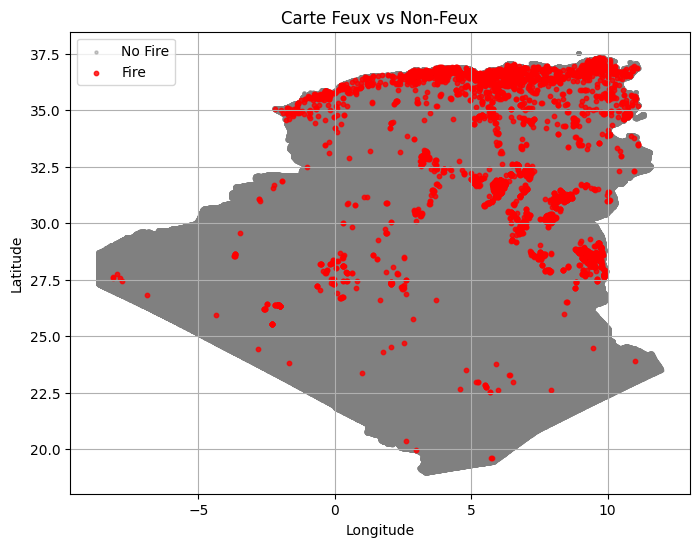

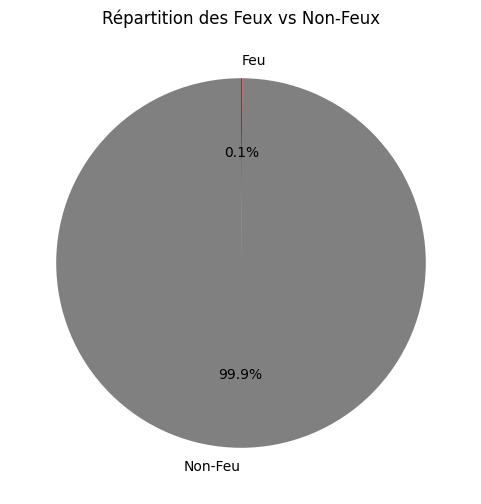

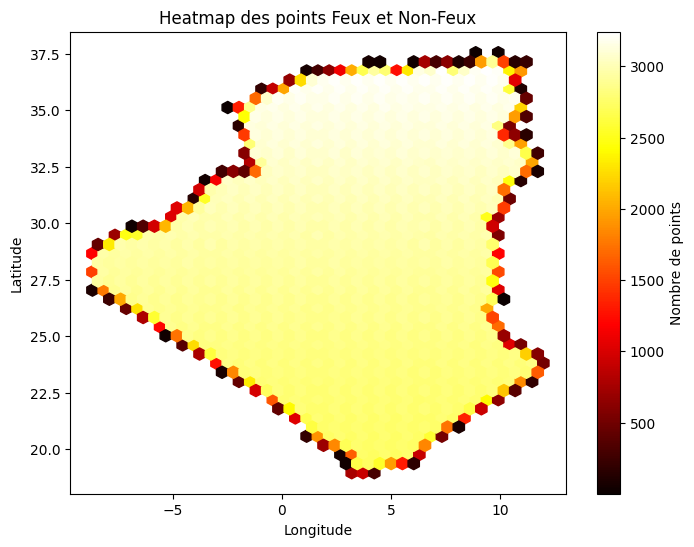

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger fire_final.csv
fire = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv")

print(fire.head())
print(fire["fire"].value_counts())

# ============================
# 1) Scatter Map : Feux vs Non-Feux
# ============================

plt.figure(figsize=(8, 6))

# Non-feux
plt.scatter(
    fire[fire["fire"]==0]["longitude"],
    fire[fire["fire"]==0]["latitude"],
    s=5, c="grey", alpha=0.4, label="No Fire"
)

# Feux
plt.scatter(
    fire[fire["fire"]==1]["longitude"],
    fire[fire["fire"]==1]["latitude"],
    s=10, c="red", alpha=0.8, label="Fire"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte Feux vs Non-Feux")
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 2) Pie Chart : Pourcentage Feux / Non-Feux
# ============================

counts = fire["fire"].value_counts()
labels = ["Non-Feu", "Feu"]
sizes = [counts[0], counts[1]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["grey", "red"])
plt.title("Répartition des Feux vs Non-Feux")
plt.show()

# ============================
# 3) Heatmap (Hexbin)
# ============================

plt.figure(figsize=(8, 6))
plt.hexbin(
    fire["longitude"],
    fire["latitude"],
    gridsize=40,
    cmap="hot",
    mincnt=1
)
plt.colorbar(label="Nombre de points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap des points Feux et Non-Feux")
plt.show()


In [1]:
import pandas as pd

# Charger ton dataset final
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final.csv"
df = pd.read_csv(path)

# Vérifier les valeurs uniques
print("Valeurs uniques dans 'fire' :", df["fire"].unique())

# Comptage
counts = df["fire"].value_counts()
total = len(df)

# Pourcentages
percentages = (counts / total) * 100

print("\n--- Résultats ---")
print(f"Total points : {total}")
print(f"🔥 Fire (1) : {counts.get(1,0)}  → {percentages.get(1,0):.2f}%")
print(f"❄️ Non-Fire (0) : {counts.get(0,0)} → {percentages.get(0,0):.2f}%")


Valeurs uniques dans 'fire' : [1 0]

--- Résultats ---
Total points : 3247226
🔥 Fire (1) : 3819  → 0.12%
❄️ Non-Fire (0) : 3243407 → 99.88%
